## Iris dataset exploration and classification for Bootcamp DL test
#### Sergey Kuper

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

### Load Data

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

### Data Exploration and visualization

In [3]:
X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target
print(f'data shape: {X.shape}\n')
print(f'count of Null values in the dataset:\n\n {X.isnull().sum()}\n')
print(f'shape of the target array: {y.shape}')
print(f'Target name keys: {iris.target_names}')

data shape: (150, 4)

count of Null values in the dataset:

 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

shape of the target array: (150,)
Target name keys: ['setosa' 'versicolor' 'virginica']


In [4]:
X.insert(X.shape[1],'y',y)

In [5]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


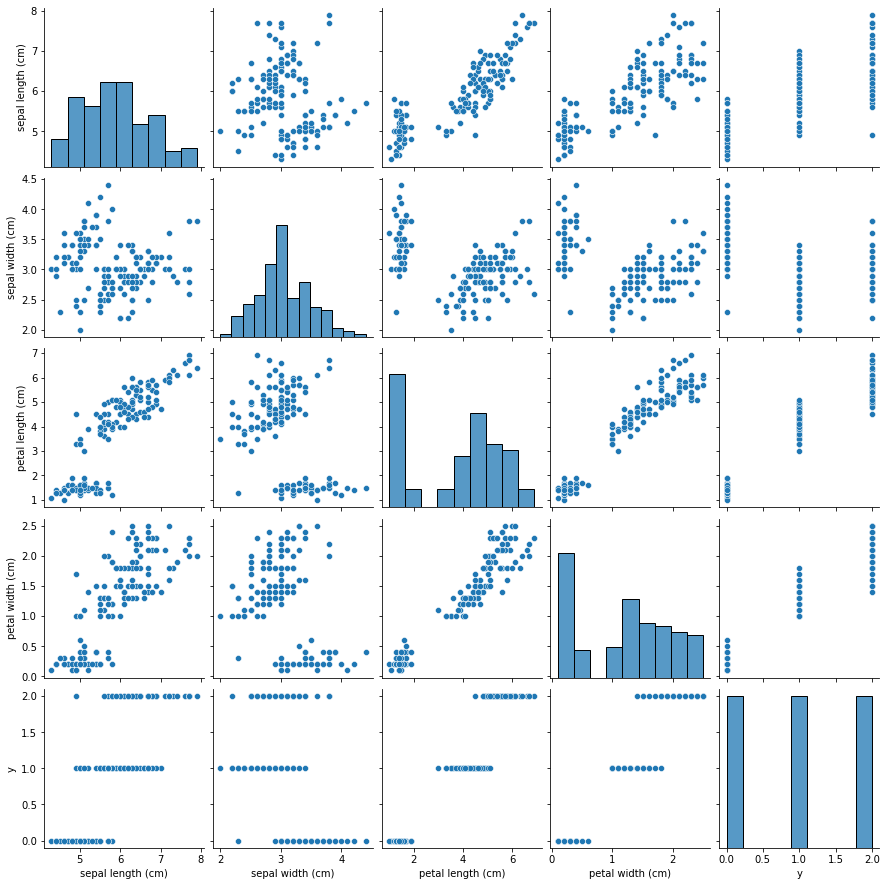

In [6]:
sns.pairplot(X)

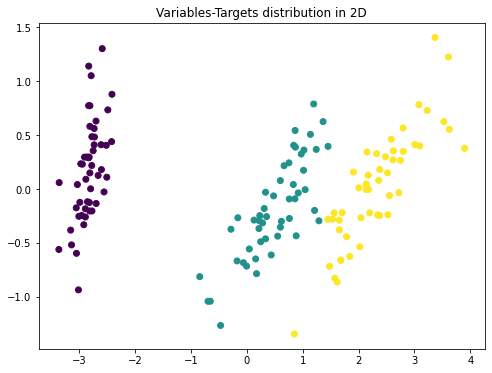

In [7]:
pca = PCA(n_components=2)
two_dim_data = pca.fit_transform(X)
plt.figure(figsize=(8,6))
plt.scatter(two_dim_data[:,0],two_dim_data[:,1],c=y)
plt.title('Variables-Targets distribution in 2D')
plt.show()

### Data preprocessing 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,:-1].values, y, test_size=0.33, random_state=42)

In [9]:
results = []

### Support Vector Machine classifier

In [10]:
svc_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc_clf.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [11]:
scv_pred = svc_clf.predict(X_test)
results.append(['SVC',accuracy_score(y_test, scv_pred),recall_score(y_test, scv_pred, average=None),f1_score(y_test, scv_pred, average=None)])

### KNN classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
scaler = StandardScaler()
pipe = Pipeline(steps=[("scaler", scaler), ("knn", knn)])

parameters = {'n_neighbors':np.arange(1,5)}

param_grid = {"knn__n_neighbors": [2,3,4,5]} #[i for i in range(1,5)]

knn_clf = GridSearchCV(pipe, param_grid) #, n_jobs=2

knn_clf.fit(X_train,y_train)
knn_clf.best_params_

{'knn__n_neighbors': 3}

In [13]:
knn_pred = knn_clf.predict(X_test)
results.append(['KNN',accuracy_score(y_test, knn_pred),recall_score(y_test, knn_pred, average=None),f1_score(y_test, knn_pred, average=None)])

### Showing results and comparing models

In [14]:
pd.DataFrame(results, columns = ['Model','Accuracy','Recall Score','F1 Score'])


,Model,Accuracy,Recall Score,F1 Score
0,SVC,0.98,"[1.0, 1.0, 0.9375]","[1.0, 0.967741935483871, 0.967741935483871]"
1,KNN,0.98,"[1.0, 1.0, 0.9375]","[1.0, 0.967741935483871, 0.967741935483871]"


### Conclusion and further improvements

Both models showed same results. The models weren't tuned very scrupulously, but made to show the methodology. Furthur fine tuning of hyperparameters can potentially improve the results.